# 개요

## 전처리란?

**`전처리`**
: 데이터를 분석의 목적에 맞게 가공하는 일련의 작업 과정
- Forbes에서 인용한 CrowdFlower의 설문 결과에 따르면 데이터 분석가는 업무 시간 중 80% 정도를 데이터 수집 및 전처리 과정에 사용한다고 합니다.

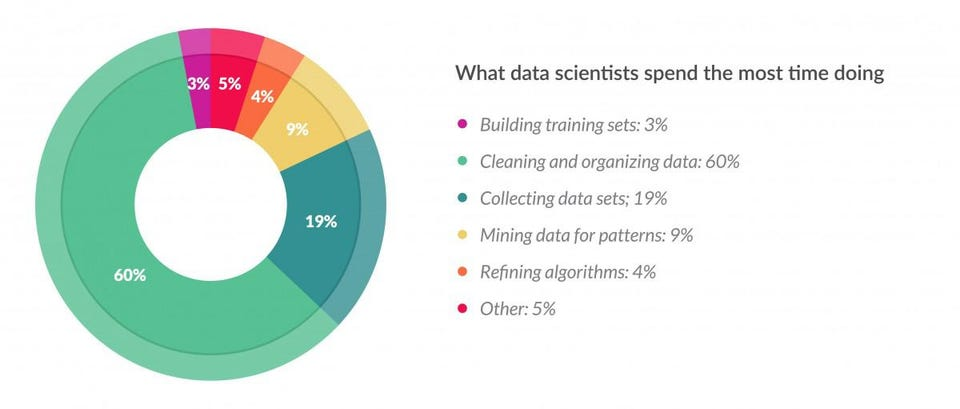

   - 데이터 전처리는 보통 다음의 순서로 진행합니다.
       - **`데이터 셋 확인`** => **`결측값 처리`** => **`이상값 처리`** => **`Feature Engineering`**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [53]:
# 중고 자동차 데이터 셋 불러오기
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

# `단계 1` - **데이터 셋 확인**
- 분석하고자 하는 데이터 셋과 친해지는 단계입니다. 데이터 셋에 대해 아래 두 가지 확인 작업을 하게 됩니다.<br><br>
 - **변수확인**
 - **RAW 데이터 확인**

info 함수를 통해 '데이터의 결측치,타입,컬럼 특징' 등의 정보 확인 가능

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

결측치가 있는지만 확인하고 싶을때
-> isnull().sum()

In [55]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [56]:
pd.set_option('display.max_columns',20) #None 값이 들어가면 전체 열을 보여줌
display(df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


판다스 모듈에서 배웠던 함수를 활용해 데이터가 어떤 내용을 담고있는지 파악하기
각 컬럼별로 의미하는 바에 대해 이해하는 것이 데이터 전처리의 시작!

In [57]:
df["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [58]:
df["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

"?" 값을 결측치라고 생각하고 Nan값으로 대체하겠습니다

In [59]:
df.replace("?", np.nan, inplace = True)
display(df.head())
display(df.isnull().sum())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# `단계 2` - **결측값 처리**

## 삭제

- 1) 결측값이 발생한 모든 관측치를 삭제하거나 (**전체 삭제**, Listwise Deletion),<br> 2) 데이터 중 모델에 포함시킬 변수들 중 결측값이 발생한 모든 관측치를 삭제하는 방법(**부분 삭제**)이 있습니다.<br><br>
- **전체 삭제**는 간편한 반면 관측치가 줄어들어 모델의 **유효성**이 낮아질 수 있고,<br> **부분 삭제**는 모델에 따라 변수가 제각각 다르기 때문에 **관리 Cost**가 늘어난다는 단점이 있습니다. <br><br>
- 삭제는 결측값이 **무작위**로 발생한 경우에 사용합니다. 
    - 결측값이 무작위로 발생한 것이 아닌데 관측치를 삭제한 데이터를 사용할 경우 왜곡된 모델이 생성될 수 있습니다.

In [60]:
df_1 = df.copy()
df_1.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

**아이디어**: 결측값이 적은 컬럼의 경우 행 삭제를 통해 전처리

Dropna 대표적 파라미터
***DataFrame.dropna(axis=0/1, how='any'/'all', subset=[col1, col2, ...], inplace=True/False)***
- axis = 0/1 or 'index'/'columns'\
 0 or 'index' -> NaN 값이 포함된 row를 drop (default 값입니다.) \
 1 or 'columns' -> NaN 값이 포함된 column을 drop \
  \
- how = 'any'/'all' \
any -> row 또는 column에 NaN값이 1개만 있어도 drop (default 값입니다.) \
all -> row 또는 column에 있는 모든 값이 NaN이어야 drop \
\
- inplace = True/False \
True -> dropna가 적용된 DataFrame 자체에 dropna를 적용\
False -> dropna가 적용된 DataFrame는 그대로 두고 dropna를 적용한 DataFrame을 return\
 \
- subset = [col1, col2, ...] \
subset을 명시하지 않으면 DataFrame 전체(모든 column & 모든 row)에 대해 dropna를 진행 \
subset을 명시하면 subset에 적힌 column값에 대해서만 dropna를 진행 

In [61]:
# NaN값을 가진 로우 삭제하기 ===> 전체삭제

# dropna(how='any') : 하나의 데이터라도 결측값이면 행을 삭제
len_before = len(df_1)

# horsepower column의 결측치가 1개라도 있으면, 해당하는 row를 삭제
len_after = len(df_1.dropna(subset=["horsepower","stroke"], how='any', axis=0))

print('전체 행의 개수:',len_before)
print('사라지는 행의 개수:',len_before-len_after)
print('남는 행의 개수:',len_after) 

전체 행의 개수: 205
사라지는 행의 개수: 6
남는 행의 개수: 199


In [62]:
# horsepower", "stroke" 컬럼에 값이 없는 레코드를 삭제한다.
df_1.dropna(subset=["horsepower","stroke"],
            how='any', 
            axis=0, 
            inplace=True)
df_1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


행의 개수는 199개로 줄었지만 인덱스는 그대로이므로 인덱스 리셋 진행

In [63]:
df_1.reset_index(drop=True, inplace=True)
display(df_1.tail())
print(len(df_1))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
194,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
195,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
197,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
198,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


199


In [64]:
# horsepower와 stroke 모두 결측치가 있는 row는 없다.
# 따라서 dropna(how = 'all')로 했을 때, 삭제된 row가 없다

len_before = len(df)
len_after = len(df.dropna(subset=["horsepower","stroke"], how='all', axis=0))

print('전체 행의 개수:',len_before)
print('사라지는 행의 개수:',len_before - len_after)
print('남는 행의 개수:',len_after) 

전체 행의 개수: 205
사라지는 행의 개수: 0
남는 행의 개수: 205


## 다른 값으로 대체 (평균, 최빈값, 중간값)

- 결측값이 발생한 경우 다른 관측치의 평균, 최빈값, 중간값 등으로 대체할 수 있습니다.<br><br>
- 1) 모든 관측치의 평균값 등으로 대체하는 **일괄 대체 방법**<br> 2) 범주형 변수를 활용해 유사한 유형의 평균값 등으로 대체하는 **유사 유형 대체 방법**이 있습니다. 
    - (예 – 남자 키의 평균 값 173, 여자 키의 평균 값 158인 경우, 남자 관측치의 결측 값은 173으로 대체)<br><br>
- 결측값의 발생이 다른 변수와 관계가 있는 경우 대체 방법이 유용한 측면은 있지만, 유사 유형 대체 방법의 경우 어떤 범주형 변수를 유사한 유형으로 선택할 것인지는 자의적으로 선택하므로 모델이 왜곡될 가능성이 존재합니다.

**아이디어**: 결측값이 많은 컬럼의 경우 일괄 대체 통해 전처리

In [65]:
display(df_1[df_1['normalized-losses'].isnull()].head())
print(len(df_1[df_1['normalized-losses'].isnull()]))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


39


복습
- 조건문을 활용한 **index 추출**

In [66]:
# index 추출 예시
# 조건문을 통해 True False를 뽑아낸 뒤, 데이터프레임에 이를 적용해 index를 뽑아낸다
print(df_1['symboling'] > 2)

# df_1['normalized-losses'].isnull() 또한 같은 원리다
print('-------------------------------------------')
print(df_1['normalized-losses'].isnull())

0       True
1       True
2      False
3      False
4      False
       ...  
194    False
195    False
196    False
197    False
198    False
Name: symboling, Length: 199, dtype: bool
-------------------------------------------
0       True
1       True
2       True
3      False
4      False
       ...  
194    False
195    False
196    False
197    False
198    False
Name: normalized-losses, Length: 199, dtype: bool


### 일괄 대체 (평균값 활용)

평균값으로 결측치를 대체하기 위해 해당 컬럼의 데이터 타입형에 대해 파악해야함

In [67]:
df[['normalized-losses']].info()

#df['normalized-losses'].mean()
#오류 발생

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   normalized-losses  164 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


평균 계산을 위해 데이터 타입을 실수형 데이터로 바꿔주기 (astype 활용)

In [68]:
avg_norm_loss = df['normalized-losses'].astype("float").mean()

print(f'대체할 평균 값은: {avg_norm_loss} 입니다')

대체할 평균 값은: 122.0 입니다


fillna 함수를 통해 결측치를 입력하기

In [69]:
# fillna 로 결측치 입력
df_1['normalized-losses'] = df_1['normalized-losses'].fillna(avg_norm_loss)

#결측치 확인
df_1['normalized-losses'].isnull().sum()

0

### 유사 유형 대체 (다른 데이터 활용)

price 컬럼의 결측값 4개를 각 make별 price의 평균으로 대체

In [70]:
check_index = df_1[df_1['price'].isnull()].index
display(df_1[['make','price']].loc[check_index])

,make,price
9,audi,NaN
44,isuzu,NaN
45,isuzu,NaN
125,porsche,NaN


In [71]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       197 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

In [72]:
# 유사유형대체법
df_1['price'] = df_1['price'].astype("float")
df_1_make_avg = df_1.groupby("make")['price'].transform("mean")

df_1['price'].fillna(df_1_make_avg, inplace=True)

print(df_1_make_avg)

display(df_1[['make','price']].loc[check_index])

#df_1.groupby("make")['price']. ~~~

0      15498.333333
1      15498.333333
2      15498.333333
3      17859.166667
4      17859.166667
           ...     
194    18063.181818
195    18063.181818
196    18063.181818
197    18063.181818
198    18063.181818
Name: price, Length: 199, dtype: float64


,make,price
9,audi,17859.166667
44,isuzu,8916.500000
45,isuzu,8916.500000
125,porsche,31400.500000


### 최빈값 대체

In [73]:
#'num-of-doors' 컬럼에서 값이 없는 레코드를 최빈값으로 대체한다. 

print("Value counts :")
print(df_1['num-of-doors'].value_counts())

# 최빈값 확인
print('\n방법 1:', df_1['num-of-doors'].mode().values)
print('방법 2:', df_1['num-of-doors'].value_counts().idxmax())

Value counts :
four    113
two      84
Name: num-of-doors, dtype: int64

방법 1: ['four']
방법 2: four


In [74]:
#최빈값으로 대체
check_index = df_1[df_1['num-of-doors'].isnull()].index
print('결측치 처리 전')
display(df_1[["num-of-doors"]].loc[check_index])

df_1["num-of-doors"].replace(np.nan, "four", inplace=True)

print('------------------------------------------')
print('결측치 처리 후')
display(df_1[["num-of-doors"]].loc[check_index])

결측치 처리 전


,num-of-doors
27,NaN
59,NaN


------------------------------------------
결측치 처리 후


,num-of-doors
27,four
59,four


## 실습 1

In [75]:
np.random.seed(123)
ex_1 = pd.DataFrame({
                   "col_1": np.random.randn(7),
                   "col_2": np.random.randn(7)
                  })
ex_1.loc[8] = np.nan
ex_1

,col_1,col_2
0,-1.085631,-0.428913
1,0.997345,1.265936
2,0.282978,-0.866740
3,-1.506295,-0.678886
4,-0.578600,-0.094709
5,1.651437,1.491390
6,-2.426679,-0.638902
8,NaN,NaN


- ex_1에서 col_1, col_2의 결측치를 각 칼럼의 평균으로 채우기

In [76]:
avg_norm_loss1 = ex_1['col_1'].astype('float').mean()
avg_norm_loss2 = ex_1['col_2'].astype('float').mean()

ex_1['col_1'] = ex_1['col_1'].fillna(avg_norm_loss1 )
ex_1['col_2'] = ex_1['col_2'].fillna(avg_norm_loss2 )

ex_1

,col_1,col_2
0,-1.085631,-0.428913
1,0.997345,1.265936
2,0.282978,-0.866740
3,-1.506295,-0.678886
4,-0.578600,-0.094709
5,1.651437,1.491390
6,-2.426679,-0.638902
8,-0.380778,0.007025


## 실습 2

In [77]:
# 실습
raw_data = {'first_name': ['Jason','Tina', 'Jake', 'Amy','Julia'],
        'last_name': ['Miller','Ali', 'Milner', 'Cooze','May'],
        'age': [42,36, 24, 73,46],
        'sex': ['m','f', 'm', 'f','f'],
        'preTestScore': [4,np.nan, 2, 3, 2],
        'postTestScore': [25,np.nan, 62, 70, 58]}
df_ex2 = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df_ex2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42,m,4.0,25.0
1,Tina,Ali,36,f,NaN,NaN
2,Jake,Milner,24,m,2.0,62.0
3,Amy,Cooze,73,f,3.0,70.0
4,Julia,May,46,f,2.0,58.0


In [78]:
#postTestScore의 결측치를 성별별 평균으로 채우기
postTestScore_mean = df_ex2.groupby('sex')['postTestScore'].transform("mean")

df_ex2['postTestScore'].fillna(postTestScore_mean, inplace = True)
df_ex2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42,m,4.0,25.0
1,Tina,Ali,36,f,NaN,64.0
2,Jake,Milner,24,m,2.0,62.0
3,Amy,Cooze,73,f,3.0,70.0
4,Julia,May,46,f,2.0,58.0


In [79]:
df_1.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

결측치 끝!

# `단계 3` - **이상치 처리(Handling Outliers)**
## 이상치 확인

- **이상치**란 기존 데이터들과 거리가 먼 데이터이다.
     - 예를 들어, 이런값들이(234,234, 267, 1, 200, 245, 300, 199, 250, 8999, 245)이 세트로 주어졌다고 하면,<br> 
이 1과 8999는 **이상치(outlier)**라고 할 수 있다.

In [80]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


- describe 함수: 데이터의 개수(count), 평균(mean), 표준편차(std), 분위수(25,50,75%), 최대최소(max,min)를 보여줌
- 기본 수치 기술통계량 확인 가능 

### 시각화

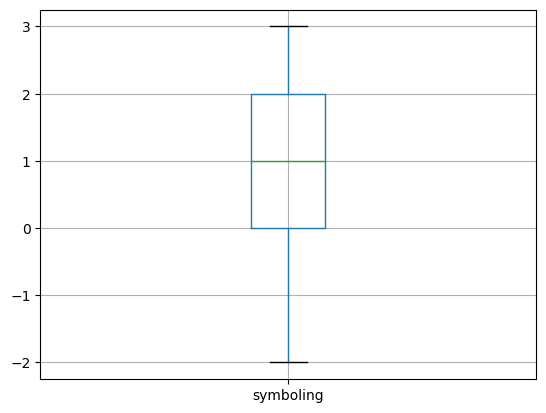

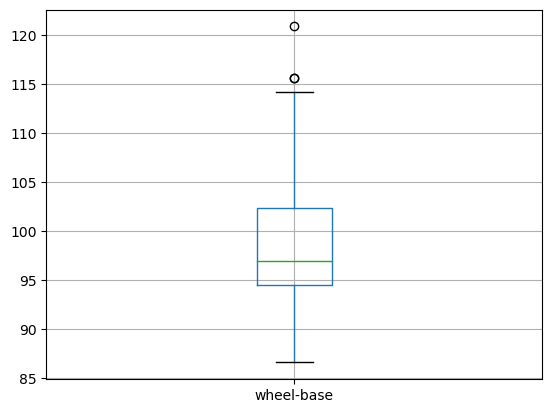

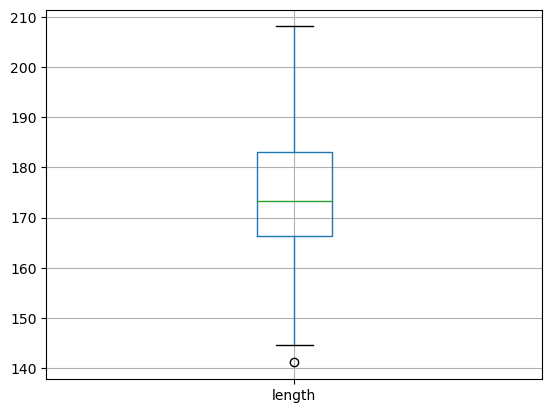

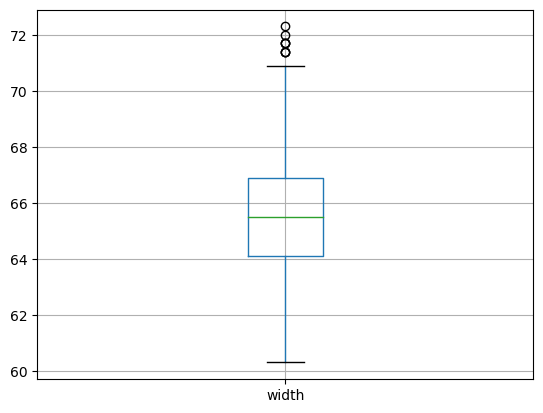

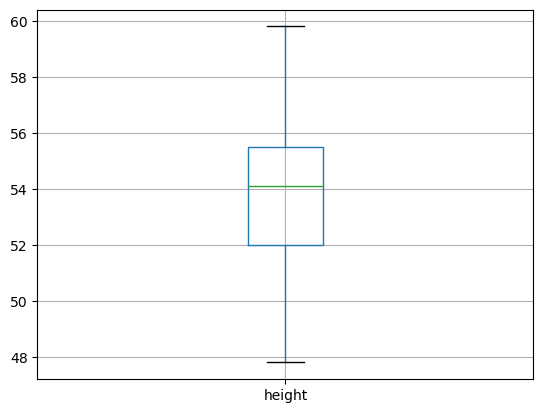

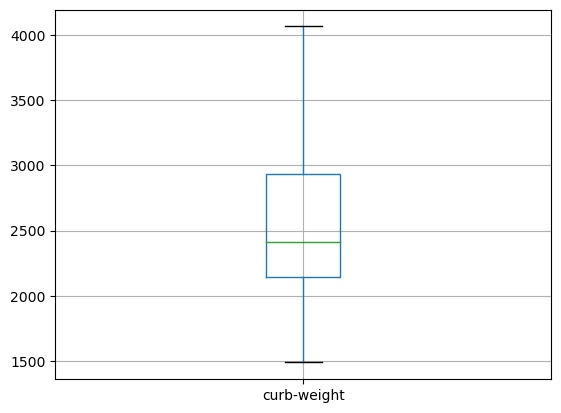

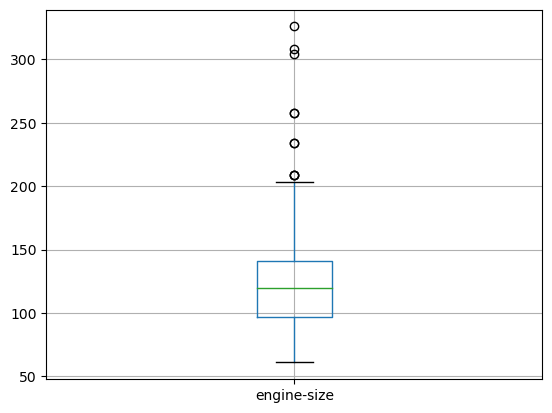

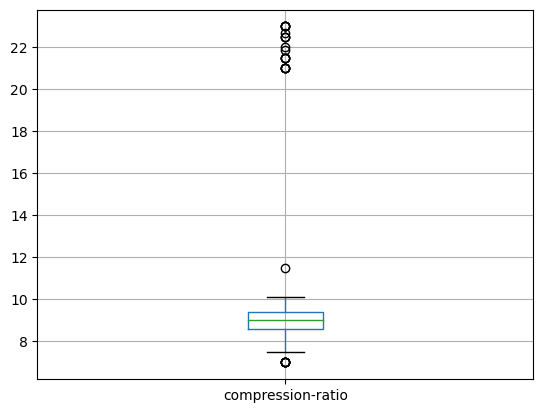

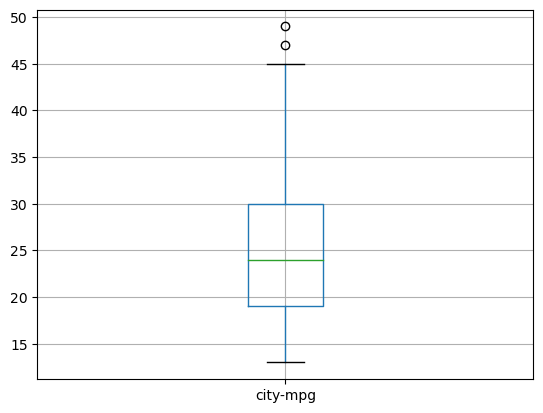

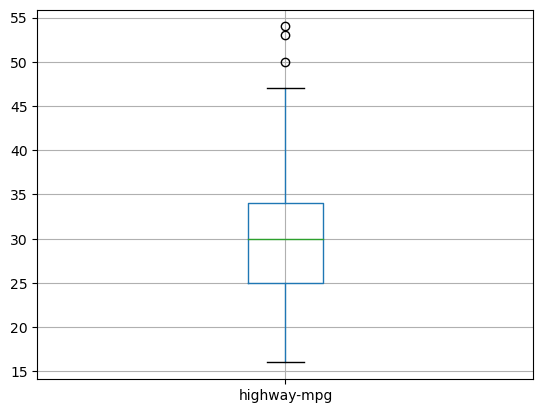

In [81]:
for i in df.describe().columns:
    df[[i]].boxplot()
    plt.show()

시각적으로 이상치가 많은 컬럼을 확인가능하지만 기준이 없기에 애매함

### Z-score

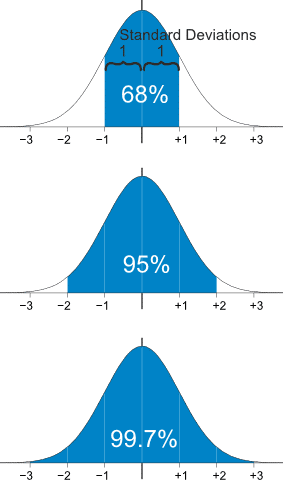

데이터의 Z-score 는 해당 데이터가 평균으로부터 얼마의 표준 편차만큼 벗어나 있는지를 의미한다. 예를 들어 3 표준 편차 만큼을 벗어나는 데이터를 이상치로 처리하는 것은 Z-score 가 3 보다 크고 -3 보다 작은 데이터를 이상치로 처리하는 것과 같은 작업이다.

In [82]:
def find_outlier_z(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    
    z_score = [(y-mean)/std for y in data] #표준화

    masks = np.where(np.abs(z_score)>threshold)
    
    return masks

find_outlier_z(df["compression-ratio"])

(array([ 63, 158, 159, 174, 182, 184, 187, 192, 203], dtype=int64),)

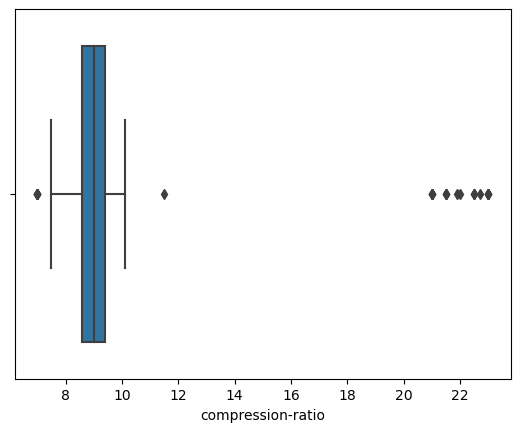

In [83]:
sns.boxplot(x=df["compression-ratio"])
plt.show()

### IQR (Interquartile Range) with Box plots

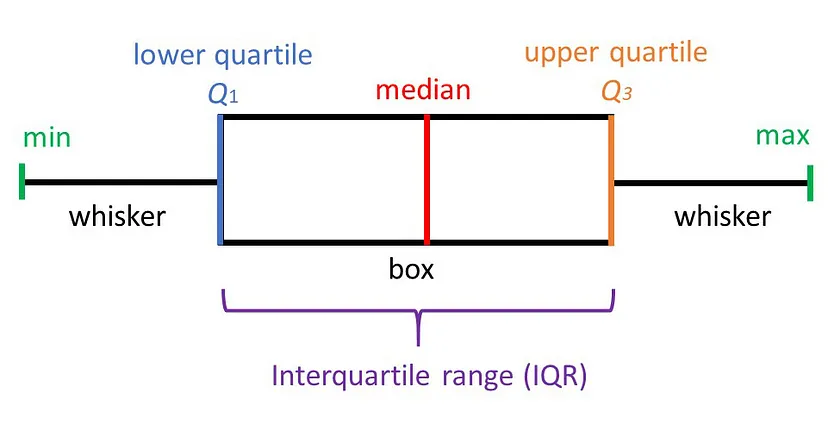

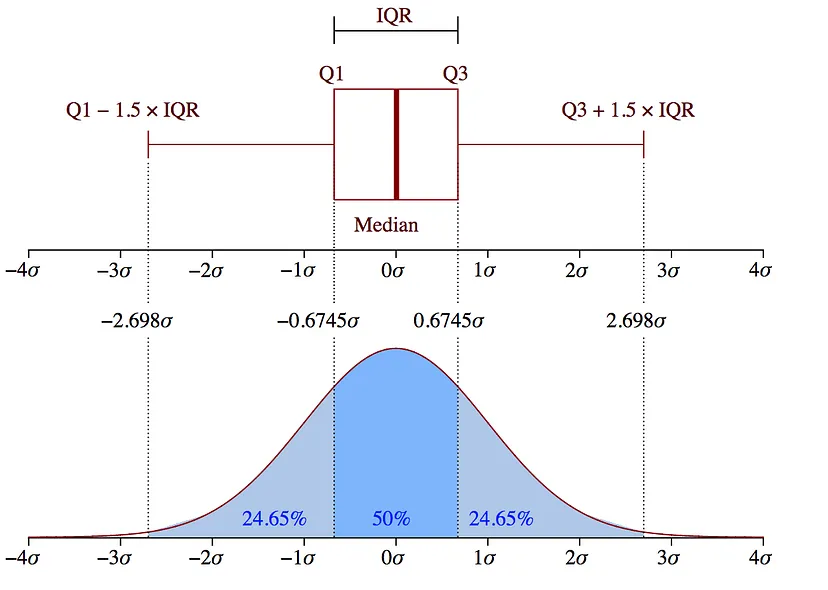

(Q1 – 1.5 * IQR) 보다 작거나 (Q3 + 1.5 * IQR) 보다 큰 데이터는 이상치로 처리한다. 1.5 보다 큰 3 혹은 그 이상의 값을 곱하기도 하며 값이 클수록 더욱 최극단의 이상치를 처리함을 알 수 있다.

In [84]:
def find_outlier_by_Tukey(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다')
    
    # np.where은 데이터의 인덱스를 반환
    mask = np.where((data>upper_bound) | (data<lower_bound)) 
    
    # np.where을 Dataframe.index로 바꿔서 쓸 수도 있다
    #mask = data[(data['feature'] > upper_bound) | (data['feature'] < lower_bound)].index
    return mask

find_outlier_by_Tukey(df["compression-ratio"])

lower_bound는 7.4, upper_bound는 10.6 입니다


(array([  9,  29,  49,  63,  66,  67,  68,  69,  70,  82,  83,  84,  90,
        108, 110, 112, 114, 116, 117, 124, 158, 159, 174, 182, 184, 187,
        192, 203], dtype=int64),)

In [85]:
# 이상치 확인
for i in find_outlier_by_Tukey(df["compression-ratio"]):
   print(df["compression-ratio"].loc[i])

lower_bound는 7.4, upper_bound는 10.6 입니다
9       7.0
29      7.0
49     11.5
63     22.7
66     22.0
67     21.5
68     21.5
69     21.5
70     21.5
82      7.0
83      7.0
84      7.0
90     21.9
108    21.0
110    21.0
112    21.0
114    21.0
116    21.0
117     7.0
124     7.0
158    22.5
159    22.5
174    22.5
182    23.0
184    23.0
187    23.0
192    23.0
203    23.0
Name: compression-ratio, dtype: float64


## 이상치 처리
### 단순삭제

- 이상값이 **Human error**에 의해서 발생한 경우에는 해당 관측치를 **삭제**하면 됩니다. <br>
- 단순 오타나, 주관식 설문 등의 비현실적인 응답, 데이터 처리 과정에서의 오류 등의 경우에 사용합니다.ex) 나이가 255세
> 이상치 데이터 제거하기 (이상치가 아닌 데이터만 채택하기) \
> 결측치 삭제와 유사

### 다른 값으로 대체

- 절대적인 관측치의 **숫자가 작은 경우**, 단순삭제를 통해 이상치를 제거하면 관측치의 절대량이 작아지는 문제가 발생합니다.<br>
- 이런 경우 이상값이 Human error에 의해 발생했더라도 관측치를 삭제하는 대신 다른 값(평균 등)으로 **대체**하거나, 결측값과 유사하게 다른 변수들을 사용해서 예측 모델을 만들고, 이상값을 **예측**한 후 해당 값으로 대체하는 방법도 사용할 수 있습니다.
- valu modification: 하한값과 상한값을 결정한 후 하한값보다 적으면 하한값으로 대체하고 상한값보다 크면 상한값으로 대체하는 관측값 변경
- weight modification: 이상치의 영향을 감소시키는 가중치 조정

### 변수화
- 이상값이 **자연 발생**한 경우, 단순 삭제나 대체의 방법을 통해 수립된 모델은 설명/예측하고자 하는 현상을 잘 설명하지 못할 수도 있습니다. 
    - 예를 들어, 아래 그래프에서 다른 관측치들만 보면 경력과 연봉이 비례하는 현상이 존재하는 것 처럼 보이지만, 5년차의 연봉 $35,000인 이상치가 포함됨으로써 모델의 설명력이 크게 낮아 집니다. <br><br>    
- 자연발생적인 이상값의 경우, 바로 삭제하지 말고 좀 더 찬찬히 이상값에 대해 **파악**하는 것이 중요합니다.
    - 예를 들어, 위 이상값의 경우 의사 등 전문직종에 종사하는 사람이라고 가정해 봅시다. 이럴 경우 전문직종 종사 여부를 Yes – No로 변수화 하면 이상값을 삭제하지 않고 모델에 포함시킬 수 있습니다.


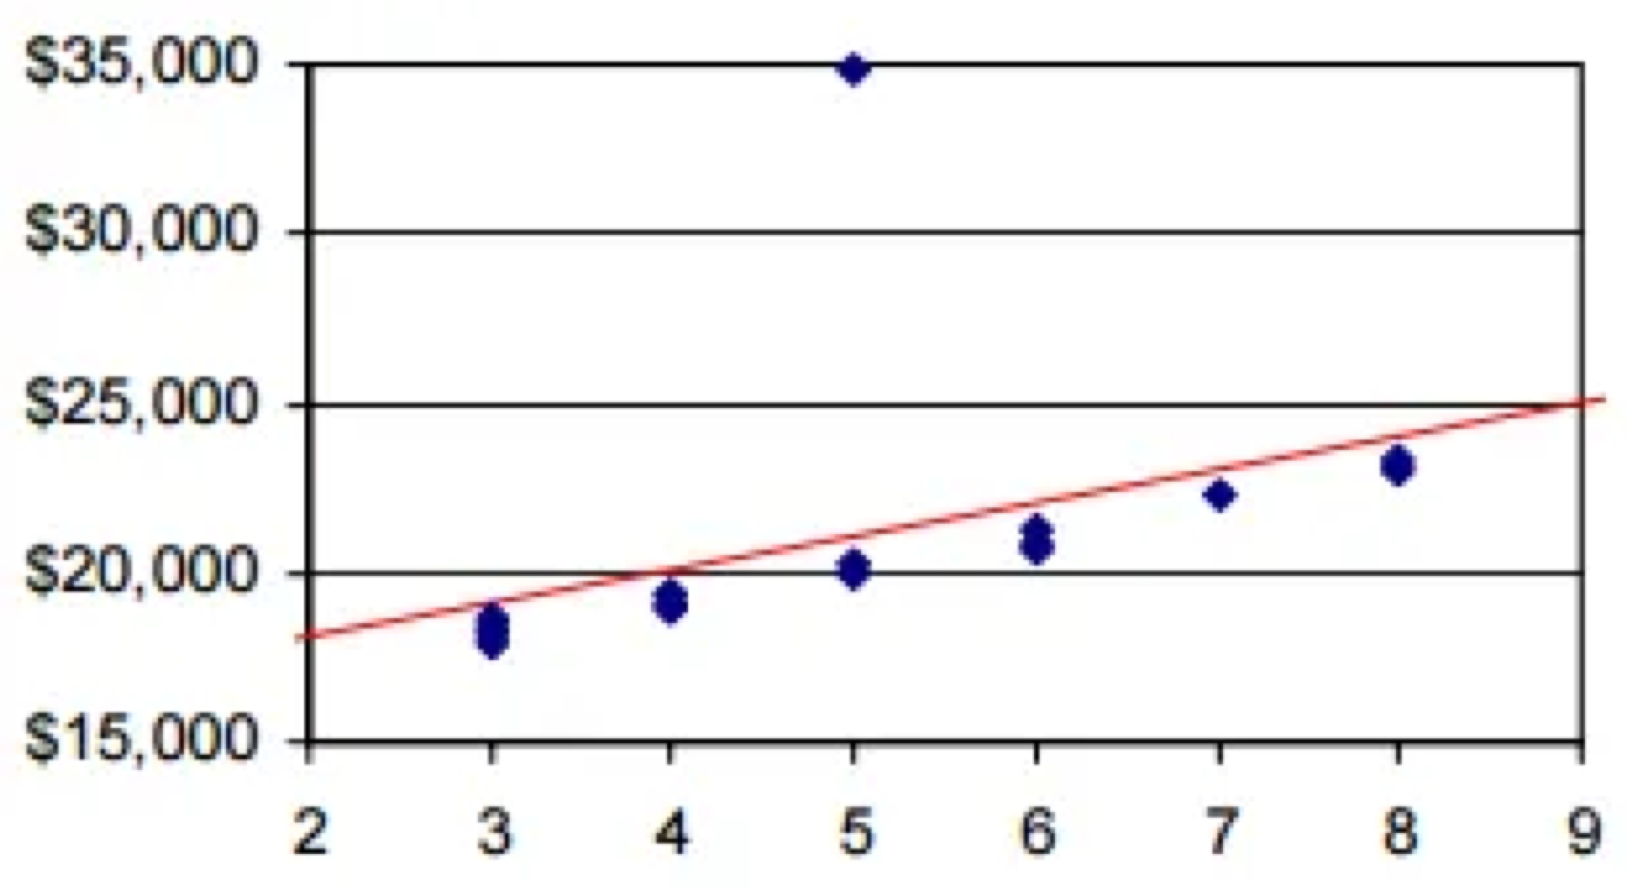

### 리샘플링
- 자연발생한 이상값을 처리하는 또 다른 방법으로는 해당 **이상값을 분리**해서 모델을 만드는 방법이 있습니다.
    - 아래와 같이 15년 이상의 경력을 가진 이상값이 존재한다고 가정해 봅시다. 이 관측치는 경력은 길지만 연봉이 비례해서 늘어나지 않은 사람입니다.
(위 사례와의 차이:
위 사례는 설명 변수, 즉 경력 측면에서는 Outlier가 아니고, 종속 변수인 연봉만 예측치를 벗어나는 반면, 본 케이스는 설명 변수, 종속 변수 모두에서 Outlier라는 점입니다.)

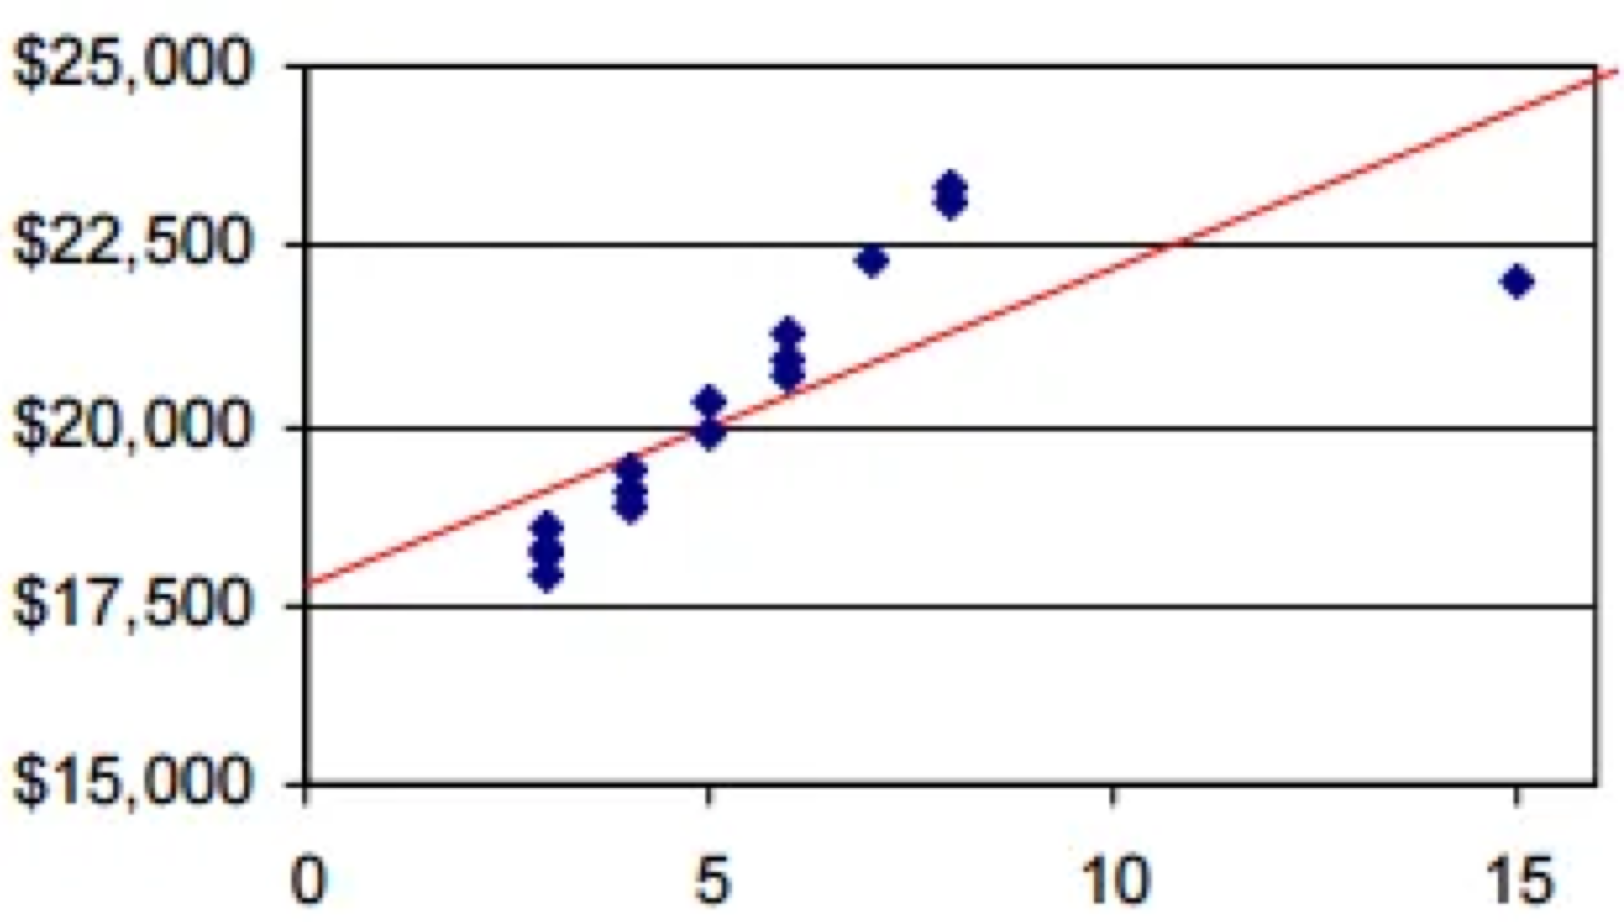

### 방법: 케이스를 분리하여 분석
- 위와 동일한 사례에서 실은 경력이 지나치게 길어질 경우 연봉이 낮아지는 현상이 실제로 발생할 수도 있습니다. (건강상의 이유 등으로)<br>
- 이 경우, 이상값을 대상에서 제외시키는 것은 현상에 대한 정확한 설명이 되지 않을 수 있습니다.<br>보다 좋은 방법은 이상값을 포함한 모델과 제외한 **모델을 모두 만들고** 각각의 모델에 대한 설명을 다는 것입니다.<br>
- 자연발생한 이상값에 별다른 특이점이 발견되지 않는다면, 단순 제외 보다는 케이스를 분리하여 분석하는 것을 추천합니다.

### 로그 변환
- 로그 변환이란 데이터의 값을 로그 함수를 적용하여 변환하는 것을 의미합니다. 로그 변환은 데이터의 스케일을 조정하고, 이상치의 영향을 줄이며, 정규성을 향상시키는 데 도움을 줄 수 있습니다.

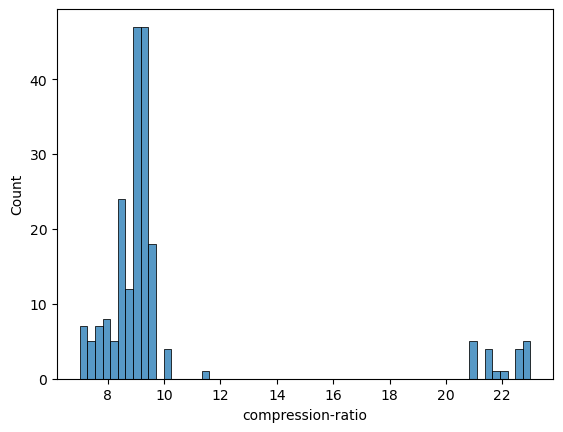

In [86]:
sns.histplot(x=df["compression-ratio"])
plt.show()

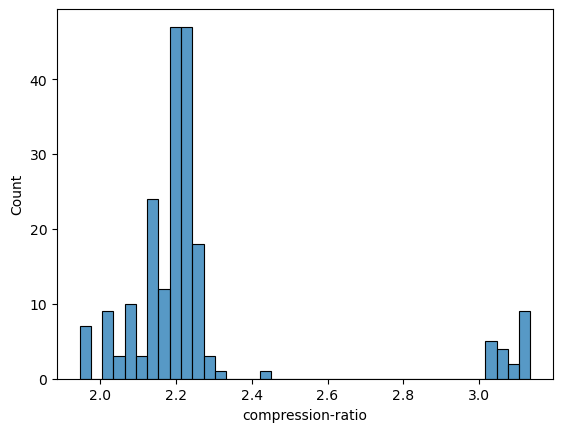

In [87]:
sns.histplot(x=np.log(df["compression-ratio"]))
plt.show()

# `단계 4` - **Feature Engineering**

- **Feature Engineering**이란, **기존**의 변수를 사용해서 데이터에 **정보를 추가**하는 일련의 과정입니다.<br>새로 관측치나 변수를 추가하지 않고도 기존의 데이터를 보다 **유용**하게 만드는 방법론입니다.

In [88]:
import os
os.getcwd()

'C:\\Users\\ppy04\\OneDrive\\바탕 화면\\workspace\\INSIGHT\\insight-10th\\code\\13155a1\\session2'

In [89]:
data = pd.read_csv("./data/penguins_size_modified1.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


## DUMMY
- 카테고리형 데이터를 수치형으로 변환하기

In [91]:
data = data.astype({'species':'category','island':'category','sex':'category'})

# 데이터 타입을 변경 시켜줘야 함. (object => 카테고리)
print(data.dtypes)
display(data)

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [92]:
categorical_data = data[['species','island','sex']]
categorical_data_copy = categorical_data.copy()

categorical_data

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,MALE
...,...,...,...
328,Gentoo,Biscoe,FEMALE
329,Gentoo,Biscoe,FEMALE
330,Gentoo,Biscoe,MALE
331,Gentoo,Biscoe,FEMALE


### Label Encoding

In [93]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes

print(categorical_data["species_cat"])
print('-----------------------------------------------')
print(categorical_data['species_cat'].dtype)

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species_cat, Length: 333, dtype: int8
-----------------------------------------------
int8


In [94]:
categorical_data

,species,island,sex,species_cat
0,Adelie,Torgersen,MALE,0
1,Adelie,Torgersen,FEMALE,0
2,Adelie,Torgersen,FEMALE,0
3,Adelie,Torgersen,FEMALE,0
4,Adelie,Torgersen,MALE,0
...,...,...,...,...
328,Gentoo,Biscoe,FEMALE,2
329,Gentoo,Biscoe,FEMALE,2
330,Gentoo,Biscoe,MALE,2
331,Gentoo,Biscoe,FEMALE,2


In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(categorical_data_copy['species'])
categorical_data_copy['species_cat'] = le.transform(categorical_data_copy['species'])


print(categorical_data_copy['species_cat'])
print('-----------------------------------------------')
print(categorical_data_copy['species_cat'].dtype)

del categorical_data_copy

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species_cat, Length: 333, dtype: int32
-----------------------------------------------
int32


In [96]:
print(categorical_data['species'].value_counts())
print()
print(categorical_data['species_cat'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

0    146
2    119
1     68
Name: species_cat, dtype: int64


### 원 핫 인코딩 dummy 변수화

판다스 get_dummies 활용

In [97]:
encoded_spicies = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

categorical_data = categorical_data.join(encoded_spicies)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)

categorical_data

,species,island,sex,species_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,MALE,0,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
4,Adelie,Torgersen,MALE,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0
329,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0
330,Gentoo,Biscoe,MALE,2,0,0,1,1,0,0,0,1
331,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0


In [98]:
categorical_data1 = pd.get_dummies(categorical_data, columns = ['species','island','sex'])
categorical_data1

,species_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1
1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
2,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
3,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
329,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
330,2,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1
331,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0


## 실습6 island를 label 인코딩하고, 성별을 더미변수로 표현하기

In [99]:
df_ex6 = data[['species','island','sex']]
df_ex6

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,MALE
...,...,...,...
328,Gentoo,Biscoe,FEMALE
329,Gentoo,Biscoe,FEMALE
330,Gentoo,Biscoe,MALE
331,Gentoo,Biscoe,FEMALE


In [100]:
# island를 label 인코딩하고, 성별을 더미변수로 표현하기
df_ex6['island'] = df_ex6['island'].cat.codes

dummy_sex = pd.get_dummies(df_ex6['sex'])

df_ex6.join(dummy_sex).loc[:,['species','island','FEMALE','MALE']]
# df_ex3 = df_ex3.join(dummy_sex)
# df_ex3

,species,island,FEMALE,MALE
0,Adelie,2,0,1
1,Adelie,2,1,0
2,Adelie,2,1,0
3,Adelie,2,1,0
4,Adelie,2,0,1
...,...,...,...,...
328,Gentoo,0,1,0
329,Gentoo,0,1,0
330,Gentoo,0,0,1
331,Gentoo,0,1,0


## Scaling
- 변수의 **단위를 변경**하고 싶거나, 변수의 **분포가 편향**되어 있을 경우, 변수 간의 관계가 잘 드러나지 않는 경우에는 변수 변환의 방법을 사용합니다.<br>

- 가장 자주 사용하는 방법으로는 Log 함수가 있고, 유사하지만 좀 덜 자주 사용되는 Square root를 취하는 방법도 있습니다.

### StandardScaler(표준화)
- 각 feature의 평균을 0, 분산을 1로 변경합니다. 모든 특성들이 **같은 스케일**을 갖게 됩니다.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler

In [ ]:
scaled_data = data[['body_mass_g']]

standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

In [ ]:
print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())

In [ ]:
scaled_data

### 스케일링 하는 이유 확인

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,  random_state= 1422)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print("test accuracy before scaling : %0.3f" %(svc.score(X_test, y_test)))

X_train_scale = standard_scaler.fit_transform(X_train)
X_test_scale = standard_scaler.fit_transform(X_test)

svc.fit(X_train_scale, y_train)
print("test accuracy after scaling : %0.3f" %(svc.score(X_test_scale, y_test)))

## BINNING
- **연속형 변수를 범주형 변수로** 만드는 방법입니다. 
    - 예를 들어, 연봉 데이터가 수치로 존재하는 경우, 이를 100만원 미만, 101만원~200만원.. 하는 식으로 범주형 변수로 변환하는 것이죠.<br><br>

- Binning에는 특별한 원칙이 있는 것이 아니기 때문에, 분석가의 Business 이해도에 따라 창의적인 방법으로 Binning 할 수 있습니다.


In [ ]:
# 0-40 low / 40-50 medium / 50-100 high
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])

판다스 cut 함수를 통해 구간을 나누어 데이터 사용 가능

In [ ]:
bin_data

## Transform
- 기존 존재하는 변수의 성질을 이용해 **다른 변수**를 만드는 방법입니다.
    - 예를 들어, 날짜 별 판매 데이터가 있다면 날짜 변수를 주중/주말로 나눈 변수를 추가한다든지, 여행지의 방문객 데이터의 경우 해당 일에 방문객 증감 여부 등을 추가하는 것이지요.<br><br>

- Transform에도 특별한 원칙이 있는 것은 아니며, 분석가의 Business 이해도에 따라 다양한 변수가 생성될 수 있습니다.